<a href="https://colab.research.google.com/github/anastasiiaCher/pyad-2024/blob/main/lab2/PY%D0%90%D0%94_%D0%9B%D0%A02_Make_Recommendations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Данные

В этой лабораторной работе будем работать с [датасетом](https://www.kaggle.com/datasets/arashnic/book-recommendation-dataset), предназначенным для обучения алгоритма рекомендаций книг.

Для рекомендаций нам понадобятся таблицы `Books.csv` и `Ratings.scv`. Файл с рейтингами можно найти в папке с лабораторной работой на гитхабе. Файл с описаниями книг слишком большой, поэтому он располагается только по ссылке:
1. Файл с рейтингами (такой же, как в гитхабе): https://drive.google.com/file/d/1Hliaee7Y584-7lMoGeGjGabRRubzdoYn/view?usp=sharing
2. Файл с кригами:  https://drive.google.com/file/d/1JYpk5GTzK7GWT3mtDb9fNiwaVTzk8BBy/view?usp=sharing

In [1]:
import pandas as pd

In [2]:
!gdown 1Hliaee7Y584-7lMoGeGjGabRRubzdoYn
!gdown 1JYpk5GTzK7GWT3mtDb9fNiwaVTzk8BBy

Downloading...
From: https://drive.google.com/uc?id=1Hliaee7Y584-7lMoGeGjGabRRubzdoYn
To: /content/Ratings.csv
100% 22.6M/22.6M [00:00<00:00, 108MB/s]
Downloading...
From: https://drive.google.com/uc?id=1JYpk5GTzK7GWT3mtDb9fNiwaVTzk8BBy
To: /content/Books.csv
100% 73.3M/73.3M [00:00<00:00, 107MB/s]


Посмотрим на таблицу `Ratings`.

In [3]:
ratings = pd.read_csv("Ratings.csv")
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [4]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [5]:
ratings.describe().T

,count,mean,std,min,25%,50%,75%,max
User-ID,1149780.0,140386.395126,80562.277718,2.0,70345.0,141010.0,211028.0,278854.0
Book-Rating,1149780.0,2.866950,3.854184,0.0,0.0,0.0,7.0,10.0


Как распределяются рейтинги?

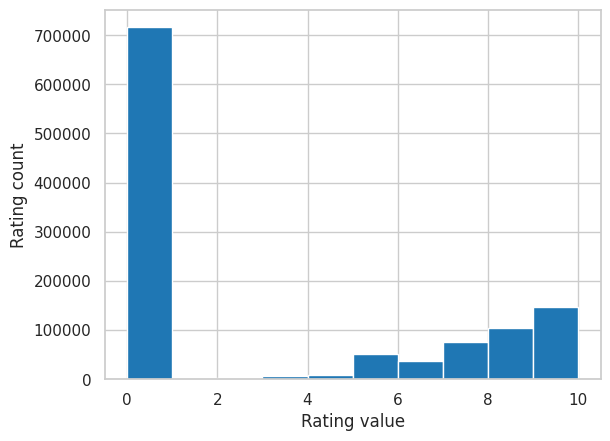

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("notebook")
sns.set_style("whitegrid")

ratings["Book-Rating"].hist()
plt.xlabel("Rating value")
plt.ylabel("Rating count")
plt.show()


Теперь посмотрим на таблицу `Books`.

In [7]:
books = pd.read_csv("Books.csv")
books.head()

<ipython-input-7-7dc4eb500039>:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv("Books.csv")


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [8]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


- Есть немножко пропусков.
- Проверим уязвимую часть данных – года – на адекватность.

In [9]:
books["Year-Of-Publication"].value_counts().sort_values(ascending=True)[:10]

,count
Year-Of-Publication,
2037,1
2011,1
2038,1
1938,1
1906,1
1919,1
1926,1
1926,1
2008,1


Есть года, которые еще не наступили...

Проверим, есть ли строковые данные в столбце с годом (потому что `info()` назвал тип данных столбца `object`).

В трех строках пропущен автор, из-за чего смещены данные. Автор либо пропущен, либо склеен с названием. Надо проверить.

In [10]:
books[books["Year-Of-Publication"].map(str).str.match("[^0-9]")]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


В сводке написано, что часть авторов и издателей провущена. Проверим, так ли это.

In [11]:
books[(books["Book-Author"].isnull()) | (books["Publisher"].isnull())]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
118033,0751352497,A+ Quiz Masters:01 Earth,NaN,1999,Dorling Kindersley,http://images.amazon.com/images/P/0751352497.0...,http://images.amazon.com/images/P/0751352497.0...,http://images.amazon.com/images/P/0751352497.0...
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...


Да, это так. Основные проблемы с данными выявили. Пора их исправлять и приступать к созданию рекомендаций.

## План анализа данных

1. Обработать данные, т.к. в данных есть несколько небольших проблем:
  1. В паре строк в таблице `Books.scv` значения столбцов сдвинуты вправо, а еще есть года, которые еще не наступили.
  2. В нескольких строках в таблице `Books.scv` есть пропуски, а также для рекомендаций в рамках лабораторной не понадобятся ссылки на картинки с обложкой.
  3. Не будем использовать для обучения записи с рейтинг равным 0 из таблицы `Ratings.scv`. Считаем, что 0 означает, что пользователь еще не оценивал книгу, но проявил к ней какой-то интерес.
  4. Не будем использовать для обучения алгоритмов те книги, которым оценка поставлена всего 1 раз. Пользователей, оценивших всего одну книгу тоже брать в расчет не будем (хотя это на самом деле будет не сильно сказываться на обобщающей способности алгоритмов, можете сами проверить).
  5. Пункты 1-4 необходимы и достаточны для выполнения всех задач. Но можно сделать более глубокую обработку.
2. Обучить [SVD](https://surprise.readthedocs.io/en/stable/getting_started.html) на следующих записях: у книги есть хотя бы одна оценка, пользователь оценил хотя бы одну книгу.
   - МАЕ должно быть ниже 1.3 (для этого есть тест)
   - **Сохранить модель.**
3. Научить линейную регрессию ([SGDRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html)) предсказывать средний рейтинг книги по следующим столбцам: автор, издатель, год издания, векторизованное название (для векторизации можно использовать [tf-idf](https://scikit-learn.org/stable/modules/feature_extraction.html#tfidf-term-weighting), [word2vec](https://radimrehurek.com/gensim/models/word2vec.html) или более сложный алгоритм. Для достижения требуемой тестом точности достаточно будет tf-idf. Собрав полностью датасет, не забудьте нормализовать данные ([StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)).
   - МАЕ должно быть ниже 1.5 (для этого есть тест)
   - **Сохранить модель.**
4. В файле `personal_recommendation.py` создайте рекомендацию для пользователя, у которого в исходном датасете было больше всего 0 среди рейтингов книг.
   Алгоритм такой:
   1. Находим нужного пользователя.
   2. Делаем предсказание SVD для книг, которым он "поставил" 0.
   3. Берем те книги, для которых предсказали рейтинг не ниже 8. Считаем, что 8 означет, что книга ему точно понравится.
   4. Делаем предсказание LinReg для этих же книг.
   5. Сортируем полученный на шаге 3 список по убыванию рейтинга линейной модели.
   6. В конце файла комментарием записываем полученную рекомендацию.

- То есть идея в том, чтобы сделать для пользователя индивидуальную рекомендацию, показывая в начале списка те книги, которые в целом могли бы иметь высокий рейтинг.
- Обязательно сохраняйте готовую модель и добавляйте ее в свой репозиторий, потому что файл с сохраненной моделью используется в тестах.

## Куда сдавать?

По инструкции в гитхаб – https://shy-question-39d.notion.site/1150ea832e418032bfc3d3e827c380fb?pvs=74

- К этой работе есть два теста – на качество получившихся моделей.
- Пул-реквест нужно сделать в ветку `lab2`.
- Можно загрузить в гитхаб файлы с реализацией по шаблону (шаблон можно дополнять и изменять под себя) или подготовить колаб с решением. Главное – сохранить модели, тесты проверяют их.

> Будьте внимательны! На гитхабе в ветке `main` обновился файл `pyad.yml`.

**Устная защита работ не требуется, но вам могут быть заданы вопросы прямо в вашем пул-реквесте!**

## Ход работы

### Задание 1 (Фильтрация данных)

In [12]:
from datetime import datetime

In [13]:
books1 = books[
    books["Year-Of-Publication"].map(str).str.match("^[0-9]+$")
]

books1 = books1[
    books1["Year-Of-Publication"].astype(int) <= datetime.now().year # Оставляем только годы <= текущему году
]

books1.count()

,0
ISBN,271345
Book-Title,271345
Book-Author,271343
Year-Of-Publication,271345
Publisher,271343
Image-URL-S,271345
Image-URL-M,271345
Image-URL-L,271345


In [14]:
display(books1)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


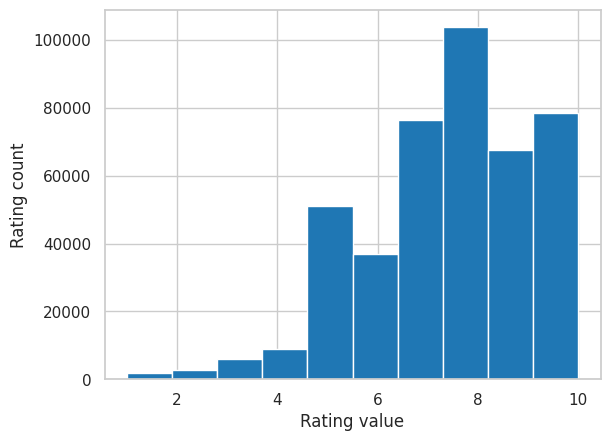

In [15]:
ratings = ratings[ratings["Book-Rating"].astype(int) != 0]
ratings.describe().T

ratings["Book-Rating"].hist()
plt.xlabel("Rating value")
plt.ylabel("Rating count")
plt.show()


In [16]:
# Удаляем книги с единственной оценкой
book_counts = ratings['ISBN'].value_counts()
books_to_keep = book_counts[book_counts > 1].index
ratings = ratings[ratings['ISBN'].isin(books_to_keep)]

# Удаляем пользователей с единственной оценкой
user_counts = ratings['User-ID'].value_counts()
users_to_keep = user_counts[user_counts > 1].index
ratings = ratings[ratings['User-ID'].isin(users_to_keep)]

### Задание 2 (SVD)

In [17]:
!pip install surprise

In [18]:
from surprise import SVD, Dataset, Reader
from surprise.model_selection import train_test_split
from surprise import accuracy
import pickle

reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(ratings[["User-ID", "ISBN", "Book-Rating"]], reader)

trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

model = SVD()
model.fit(trainset)

predictions = model.test(testset)
mae = accuracy.mae(predictions)

# Проверка MAE
if mae < 1.3:
    with open("svd.pkl", "wb") as f:
        pickle.dump(model, f)
    print(f"Модель сохранена. MAE: {mae}")
else:
    print(f"MAE выше порога: {mae}")


MAE:  1.2552
Модель сохранена. MAE: 1.2551636575321625


### Задание 3(SGDRegressor)

In [ ]:
def title_preprocessing(text: str) -> str:
    """Функция для нормализации текстовых данных в стобце Book-Title:
    - токенизация
    - удаление стоп-слов
    - удаление пунктуации
    Опционально можно убрать шаги или добавить дополнительные.
    """

    from nltk.tokenize import word_tokenize
    from nltk.corpus import stopwords
    import string


    tokens = word_tokenize(text.lower())
    stop_words = set(stopwords.words("english"))
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [word for word in tokens if word not in string.punctuation]
    return " ".join(tokens)

In [19]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_absolute_error
import pickle

# Средний рейтинг для каждой книги
average_ratings = ratings.groupby("ISBN")["Book-Rating"].mean().reset_index()
average_ratings.rename(columns={"Book-Rating": "Average-Rating"}, inplace=True)

dataset = books1.merge(average_ratings, on="ISBN", how="inner").dropna(subset=['Book-Author', 'Publisher', 'Average-Rating'])

tfidf = TfidfVectorizer(max_features=500)
title_vectors = tfidf.fit_transform(dataset['Book-Title']).toarray()

label_encoder_author = LabelEncoder()
label_encoder_publisher = LabelEncoder()

dataset['Author-Encoded'] = label_encoder_author.fit_transform(dataset['Book-Author'])
dataset['Publisher-Encoded'] = label_encoder_publisher.fit_transform(dataset['Publisher'])
dataset["Book-Title"] = dataset["Book-Title"].apply(title_preprocessing)

tfidf = TfidfVectorizer(max_features=500)
title_vectors = tfidf.fit_transform(dataset['Book-Title']).toarray()


with open("label_encoder_publisher.pkl", "wb") as file:
    pickle.dump(label_encoder_publisher, file)
with open("label_encoder_author.pkl", "wb") as file:
    pickle.dump(label_encoder_author, file)
with open("tfidf.pkl", "wb") as file:
    pickle.dump(tfidf, file)

X = dataset[['Year-Of-Publication', 'Author-Encoded', 'Publisher-Encoded']]
y = dataset["Average-Rating"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.concat([pd.DataFrame(X_scaled), pd.DataFrame(title_vectors)], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = SGDRegressor(max_iter=1000, tol=1e-3, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)

# Проверка MAE
if mae < 1.5:
    with open("linreg.pkl", "wb") as f:
        pickle.dump({"model": model, "scaler": scaler}, f)
    print(f"Модель сохранена. MAE: {mae:.3f}")
else:
    print(f"MAE выше порога: {mae:.3f}")


Модель сохранена. MAE: 0.988


### Задание 4

In [20]:
import pandas as pd
from surprise import SVD
from surprise import Dataset, Reader
import joblib
import pickle

# Загрузка данных
ratings = pd.read_csv('Ratings.csv')
books4 = pd.read_csv('Books.csv')  # Используем обработанный датасет книг (books4)

# Загрузка сохраненных моделей
svd_model = joblib.load("svd.pkl")  # Загрузка модели SVD
with open("linreg.pkl", "rb") as f:
    model_dict = pickle.load(f)


print(type(model_dict))

# Извлекаем модель и скейлер
linreg_model = model_dict["model"]
scaler = model_dict["scaler"]


print(type(linreg_model))  # Проверяем тип загруженной модели

tfidf = joblib.load("tfidf_vectorizer.pkl")  # Загрузка TF-IDF векторизатора
label_encoder_author = joblib.load("label_encoder_author.pkl")  # Загрузка энкодера для авторов
label_encoder_publisher = joblib.load("label_encoder_publisher.pkl")  # Загрузка энкодера для издателей

# Определяем пользователя с наибольшим количеством рейтингов 0
user_with_most_zeros = ratings[ratings['Book-Rating'] == 0]['User-ID'].value_counts().idxmax()

# 0. Получаем книги, оцененные этим пользователем как 0
user_zero_ratings = ratings[(ratings['User-ID'] == user_with_most_zeros) & (ratings['Book-Rating'] == 0)]
books_with_zero_ratings = user_zero_ratings['ISBN'].unique()

# 1. Используем SVD для предсказания рейтингов
reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(ratings[['User-ID', 'ISBN', 'Book-Rating']], reader)

svd_predictions = []
for isbn in books_with_zero_ratings:
    pred = svd_model.predict(user_with_most_zeros, isbn)
    if pred.est >= 8:  # Рейтинг >= 8
        svd_predictions.append((isbn, pred.est))

recommended_books = [isbn for isbn, est in svd_predictions]

# 2. Фильтруем книги, рекомендованные SVD
books_filtered = books4[books4['ISBN'].isin(recommended_books)]

# 3. Векторизация названий книг с использованием TF-IDF (как это было при обучении)
title_vectors = tfidf.transform(books_filtered['Book-Title']).toarray()

# 4. Преобразуем авторов и издателей с помощью label encoding
books_filtered['Author-Encoded'] = label_encoder_author.transform(books_filtered['Book-Author'])
books_filtered['Publisher-Encoded'] = label_encoder_publisher.transform(books_filtered['Publisher'])

# 5. Нормализуем данные
scaled_features = scaler.transform(
    books_filtered[['Year-Of-Publication', 'Author-Encoded', 'Publisher-Encoded']]
)

# 6. Объединяем все признаки для линейной регрессии
X = pd.concat([pd.DataFrame(scaled_features), pd.DataFrame(title_vectors)], axis=1)

# 7. Предсказания с использованием линейной регрессии (SGDRegressor)
books_filtered['LinReg-Pred'] = linreg_model.predict(X)

# 8. Сортируем книги по убыванию предсказанных рейтингов
final_recommendations = books_filtered.sort_values(by='LinReg-Pred', ascending=False)

# 9. Получаем топ-10 рекомендованных книг
recommendation_list = final_recommendations[['Book-Title', 'LinReg-Pred']].head(10)

# Выводим рекомендации
print(recommendation_list)

#                                                  Name     LinReg-Pred

#                                        The Green Mile     7.755636
#                               A Prayer for Owen Meany     7.752461
#     The Lion, the Witch and the Wardrobe (Full-Col...     7.744691
#     Sideways Stories from Wayside School (Wayside ...     7.693233
#     The Black Cauldron (Chronicles of Prydain (Pap...     7.682692
#                                        A Time to Kill     7.643151
#                                      Dark Inheritance     7.641812
#     The Magic School Bus Inside Ralphie: A Book Ab...     7.639294
#      The Vampire Lestat (Vampire Chronicles, Book II)     7.634556
#                            On the Banks of Plum Creek     7.625664


<ipython-input-20-edc720dc1fcf>:9: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books4 = pd.read_csv('Books.csv')  # Используем обработанный датасет книг (books4)


<class 'dict'>
<class 'sklearn.linear_model._stochastic_gradient.SGDRegressor'>


FileNotFoundError: [Errno 2] No such file or directory: 'tfidf_vectorizer.pkl'

## Измененеие кода под функции автотестов

### linreg_rec.py

In [33]:
import pickle
import re
import nltk
import pandas as pd
import sklearn

from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


import nltk
nltk.data.path.append('/usr/local/share/nltk_data')  # Добавить путь к данным, если его нет
nltk.download('punkt_tab')  # Попробуйте скачать ещё раз

nltk.download("stopwords")
nltk.download("punkt")

nltk.download('stopwords')




def books_preprocessing(df: pd.DataFrame) -> pd.DataFrame:
    from datetime import datetime
    """Функция для предобработки таблицы Books.scv"""
    books = df
    books = books[books["Year-Of-Publication"].map(str).str.match("^[0-9]+$")]

    books = books[books["Year-Of-Publication"].astype(int) <= datetime.now().year]
    books = books.drop(columns=["Image-URL-S", "Image-URL-M", "Image-URL-L"])

    return books


def ratings_preprocessing(df: pd.DataFrame) -> pd.DataFrame:
    """Функция для предобработки таблицы Ratings.scv
    Целевой переменной в этой задаче будет средний рейтинг книги,
    поэтому в предобработку (помимо прочего) нужно включить:
    1. Замену оценки книги пользователем на среднюю оценку книги всеми пользователями.
    2. Расчет числа оценок для каждой книги (опционально)."""
    ratings = df

    # Удаляем нулевые рейтинги
    ratings = ratings[ratings["Book-Rating"].astype(int) != 0]

    # Удаляем книги с единственной оценкой
    book_counts = ratings['ISBN'].value_counts()
    books_to_keep = book_counts[book_counts > 1].index
    ratings = ratings[ratings['ISBN'].isin(books_to_keep)]

    # Удаляем пользователей с единственной оценкой
    user_counts = ratings['User-ID'].value_counts()
    users_to_keep = user_counts[user_counts > 1].index
    ratings = ratings[ratings['User-ID'].isin(users_to_keep)]

    ratings = ratings.groupby("ISBN")["Book-Rating"].mean().reset_index()


    return ratings


def title_preprocessing(text: str) -> str:
    """Функция для нормализации текстовых данных в стобце Book-Title:
    - токенизация
    - удаление стоп-слов
    - удаление пунктуации
    Опционально можно убрать шаги или добавить дополнительные.
    """

    from nltk.tokenize import word_tokenize
    from nltk.corpus import stopwords
    import string


    tokens = word_tokenize(text.lower())
    stop_words = set(stopwords.words("english"))
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [word for word in tokens if word not in string.punctuation]
    return " ".join(tokens)


def modeling(books: pd.DataFrame, ratings: pd.DataFrame) -> None:
    """В этой функции нужно выполнить следующие шаги:
    1. Бинаризовать или представить в виде чисел категориальные столбцы (кроме названий)
    2. Разбить данные на тренировочную и обучающую выборки
    3. Векторизовать подвыборки и создать датафреймы из векторов (размер вектора названия в тестах – 1000)
    4. Сформировать итоговые X_train, X_test, y_train, y_test
    5. Обучить и протестировать SGDRegressor
    6. Подобрать гиперпараметры (при необходимости)
    7. Сохранить модель"""

    import pandas as pd
    from sklearn.feature_extraction.text import TfidfVectorizer
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import SGDRegressor
    from sklearn.preprocessing import StandardScaler, LabelEncoder
    from sklearn.metrics import mean_absolute_error
    import pickle

    books = books_preprocessing(books)
    ratings = ratings_preprocessing(ratings)

    # ...



    # Средний рейтинг для каждой книги

    average_ratings = ratings

    dataset = books.merge(average_ratings, on="ISBN", how="inner").dropna(subset=['Book-Author', 'Publisher', 'Book-Rating'])


    label_encoder_author = LabelEncoder()
    label_encoder_publisher = LabelEncoder()

    dataset['Author-Encoded'] = label_encoder_author.fit_transform(dataset['Book-Author'])
    dataset['Publisher-Encoded'] = label_encoder_publisher.fit_transform(dataset['Publisher'])
    dataset["Book-Title"] = dataset["Book-Title"].apply(title_preprocessing)

    tfidf = TfidfVectorizer(max_features=500)
    title_vectors = tfidf.fit_transform(dataset['Book-Title']).toarray()

    with open("label_encoder_publisher.pkl", "wb") as file:
        pickle.dump(label_encoder_publisher, file)
    with open("label_encoder_author.pkl", "wb") as file:
        pickle.dump(label_encoder_author, file)
    with open("tfidf.pkl", "wb") as file:
        pickle.dump(tfidf, file)




    X = dataset[['Year-Of-Publication', 'Author-Encoded', 'Publisher-Encoded']]
    y = dataset["Book-Rating"]

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    X_scaled = pd.concat([pd.DataFrame(X_scaled), pd.DataFrame(title_vectors)], axis=1)

    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    model = SGDRegressor(max_iter=1000, tol=1e-3, random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)

    # Проверка MAE
    if mae < 1.5:
        with open("linreg.pkl", "wb") as f:
            pickle.dump({"model": model, "scaler": scaler}, f)
        print(f"Модель сохранена. MAE: {mae:.3f}")
    else:
        print(f"MAE выше порога: {mae:.3f}")


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
display(books)

In [ ]:
display(books_preprocessing(books))

In [ ]:
display(ratings)

In [ ]:
display(ratings_preprocessing(ratings))

In [34]:
modeling(books, ratings)

Модель сохранена. MAE: 0.988


## svd_rec.py


In [31]:
import pandas as pd
import pickle

from surprise import SVD
from surprise import Dataset, Reader
from surprise.model_selection import train_test_split
from surprise import accuracy


def ratings_preprocessing(df: pd.DataFrame) -> pd.DataFrame:
    """Функция для предобработки таблицы Ratings.scv
    Целевой переменной в этой задаче будет средний рейтинг книги,
    поэтому в предобработку (помимо прочего) нужно включить:
    1. Замену оценки книги пользователем на среднюю оценку книги всеми пользователями.
    2. Расчет числа оценок для каждой книги (опционально)."""
    ratings = df

    # Удаляем нулевые рейтинги
    ratings = ratings[ratings["Book-Rating"].astype(int) != 0]

    # Удаляем книги с единственной оценкой
    book_counts = ratings['ISBN'].value_counts()
    books_to_keep = book_counts[book_counts > 1].index
    ratings = ratings[ratings['ISBN'].isin(books_to_keep)]

    # Удаляем пользователей с единственной оценкой
    user_counts = ratings['User-ID'].value_counts()
    users_to_keep = user_counts[user_counts > 1].index
    ratings = ratings[ratings['User-ID'].isin(users_to_keep)]


    return ratings


def modeling(ratings: pd.DataFrame) -> None:
    """В этой функции нужно выполнить следующие шаги:
    1. Разбить данные на тренировочную и обучающую выборки
    2. Обучить и протестировать SVD
    3. Подобрать гиперпараметры (при необходимости)
    4. Сохранить модель"""


    from surprise import SVD, Dataset, Reader
    from surprise.model_selection import train_test_split
    from surprise import accuracy
    import pickle

    ratings = ratings_preprocessing(ratings)

    reader = Reader(rating_scale=(1, 10))
    data = Dataset.load_from_df(ratings[["User-ID", "ISBN", "Book-Rating"]], reader)

    trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

    model = SVD()
    model.fit(trainset)

    predictions = model.test(testset)
    mae = accuracy.mae(predictions)

    # Проверка MAE
    if mae < 1.3:
        with open("svd.pkl", "wb") as f:
            pickle.dump(model, f)
        print(f"Модель сохранена. MAE: {mae}")
    else:
        print(f"MAE выше порога: {mae}")


In [32]:
modeling(ratings)

MAE:  1.2541
Модель сохранена. MAE: 1.2541118610313502


In [ ]:
display(ratings)

In [ ]:
display(ratings_preprocessing(ratings))

## personal_recommendation.py

In [35]:
import pandas as pd
from surprise import SVD
from surprise import Dataset, Reader
import joblib
import pickle

# Загрузка данных
ratings = pd.read_csv('Ratings.csv')
books4 = pd.read_csv('Books.csv')  # Используем обработанный датасет книг (books4)

# Загрузка сохраненных моделей
svd_model = joblib.load("svd.pkl")  # Загрузка модели SVD
with open("linreg.pkl", "rb") as f:
    model_dict = pickle.load(f)

# Извлекаем модель и скейлер
linreg_model = model_dict["model"]
scaler = model_dict["scaler"]

print(type(linreg_model))  # Проверяем тип загруженной модели

tfidf = joblib.load("tfidf.pkl")  # Загрузка TF-IDF векторизатора
label_encoder_author = joblib.load("label_encoder_author.pkl")  # Загрузка энкодера для авторов
label_encoder_publisher = joblib.load("label_encoder_publisher.pkl")  # Загрузка энкодера для издателей

# Определяем пользователя с наибольшим количеством рейтингов 0
user_with_most_zeros = ratings[ratings['Book-Rating'] == 0]['User-ID'].value_counts().idxmax()

# 0. Получаем книги, оцененные этим пользователем как 0
user_zero_ratings = ratings[(ratings['User-ID'] == user_with_most_zeros) & (ratings['Book-Rating'] == 0)]
books_with_zero_ratings = user_zero_ratings['ISBN'].unique()

# 1. Используем SVD для предсказания рейтингов
reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(ratings[['User-ID', 'ISBN', 'Book-Rating']], reader)

svd_predictions = []
for isbn in books_with_zero_ratings:
    pred = svd_model.predict(user_with_most_zeros, isbn)
    if pred.est >= 8:  # Рейтинг >= 8
        svd_predictions.append((isbn, pred.est))

recommended_books = [isbn for isbn, est in svd_predictions]

# 2. Фильтруем книги, рекомендованные SVD
books_filtered = books4[books4['ISBN'].isin(recommended_books)]

# 3. Векторизация названий книг с использованием TF-IDF (как это было при обучении)
title_vectors = tfidf.transform(books_filtered['Book-Title']).toarray()

# 4. Преобразуем авторов и издателей с помощью label encoding
books_filtered['Author-Encoded'] = label_encoder_author.transform(books_filtered['Book-Author'])
books_filtered['Publisher-Encoded'] = label_encoder_publisher.transform(books_filtered['Publisher'])

# 5. Нормализуем данные
scaled_features = scaler.transform(
    books_filtered[['Year-Of-Publication', 'Author-Encoded', 'Publisher-Encoded']]
)

# 6. Объединяем все признаки для линейной регрессии
X = pd.concat([pd.DataFrame(scaled_features), pd.DataFrame(title_vectors)], axis=1)

# 7. Предсказания с использованием линейной регрессии (SGDRegressor)
books_filtered['LinReg-Pred'] = linreg_model.predict(X)

# 8. Сортируем книги по убыванию предсказанных рейтингов
final_recommendations = books_filtered.sort_values(by='LinReg-Pred', ascending=False)

# 9. Получаем топ-10 рекомендованных книг
recommendation_list = final_recommendations[['Book-Title', 'LinReg-Pred']].head(10)

# Выводим рекомендации
print(recommendation_list)

#                                                  Name     LinReg-Pred

#                                        The Green Mile     7.755636
#                               A Prayer for Owen Meany     7.752461
#     The Lion, the Witch and the Wardrobe (Full-Col...     7.744691
#     Sideways Stories from Wayside School (Wayside ...     7.693233
#     The Black Cauldron (Chronicles of Prydain (Pap...     7.682692
#                                        A Time to Kill     7.643151
#                                      Dark Inheritance     7.641812
#     The Magic School Bus Inside Ralphie: A Book Ab...     7.639294
#      The Vampire Lestat (Vampire Chronicles, Book II)     7.634556
#                            On the Banks of Plum Creek     7.625664

<ipython-input-35-1db8f0983afe>:9: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books4 = pd.read_csv('Books.csv')  # Используем обработанный датасет книг (books4)


<class 'sklearn.linear_model._stochastic_gradient.SGDRegressor'>
                                              Book-Title  LinReg-Pred
2143   Harry Potter and the Sorcerer's Stone (Harry P...     7.774475
3459    Harry Potter and the Chamber of Secrets (Book 2)     7.743810
16198      Key of Valor (Roberts, Nora. Key Trilogy, 3.)     7.708451
26750                                 Far Side Gallery 2     7.670537
11337  Sideways Stories from Wayside School (Wayside ...     7.668986
29522  Wayside School Gets a Little Stranger (Wayside...     7.644622
21286                Cat &amp; Mouse (Alex Cross Novels)     7.640516
11332                      Little House in the Big Woods     7.636212
24292  The Lion, the Witch and the Wardrobe (Full-Col...     7.636050
19015                The Monster at the End of This Book     7.634485


<ipython-input-35-1db8f0983afe>:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_filtered['Author-Encoded'] = label_encoder_author.transform(books_filtered['Book-Author'])
<ipython-input-35-1db8f0983afe>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_filtered['Publisher-Encoded'] = label_encoder_publisher.transform(books_filtered['Publisher'])
<ipython-input-35-1db8f0983afe>:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind